# **Importing All libraries******

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from geopy.geocoders import Nominatim# module to convert an address into latitude and longitude values
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
from pandas.io.json import json_normalize
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
from pandas.io.json import json_normalize
import folium # plotting library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Client ID info for Foursquare

In [5]:
CLIENT_ID = 'KJILOVWXJS1ULPC0VURUALFW1S2ETMZEIMQNNO0MO2DRWDHQ' # your Foursquare ID
CLIENT_SECRET = 'BOCPEBHOG1LATUFM5K3UGIDJQT4C4EJFL4HP4NSO41ANVDNP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 3000

# CREATING SEARCH FOR FRIED CHICKEN IN FOURSQUARE

In [1]:
lat=28.6139 
lng=77.2090
radius= 48000
search_query = 'Fried Chicken'

In [6]:
url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,search_query)


In [7]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5f0d2714b0abf62c4a7059a7'},
 'response': {'venues': [{'id': '52d17321498e9d91a757b7a3',
    'name': 'Md. Hussain Fried Chicken',
    'location': {'address': 'Matia Mahal',
     'lat': 28.658860256848513,
     'lng': 77.22039381760102,
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.658860256848513,
       'lng': 77.22039381760102}],
     'distance': 5127,
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['Matia Mahal', 'India']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1594697947',
    'hasPerk': False},
   {'id': '51419588e4b0908186031791',
    'name': 'Kentucy Fried Chicken',
    'location': {'lat': 28.566110163035635,
     'lng': 77.16266279210416,

# NORMALIZING AND PUTTING ALL REQUESTS IN A DATAFRAME

In [9]:
Data=json_normalize(results['response']['venues'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [10]:
a=Data['categories']

# **GETING THE CATEGORY FROM THE RESULTS**

In [11]:
def getCategory(s):          
    Cat=[]
    for i,d in enumerate(s):
        if(len(d)>0) :
            Cat.append(d[0]['name'])
        else :
            Cat.append('null')
    return Cat

In [12]:
CatS=getCategory(a)

In [13]:
Data['Category']=CatS

# CHOOSING NECESSARY COLUMNS

In [14]:
FinalData=Data.loc[:,['name','location.lat','location.lng','Category']]
FinalData

,name,location.lat,location.lng,Category
0,Md. Hussain Fried Chicken,28.658860,77.220394,Indian Restaurant
1,Kentucy Fried Chicken,28.566110,77.162663,Fast Food Restaurant
2,KFC (Kentucky's Fried Chicken),28.555874,77.169290,Burger Joint
3,Kentucky Fried Chicken,28.548447,77.235174,Fast Food Restaurant
4,Arabian Fried Chicken,28.549245,77.299158,Fast Food Restaurant
5,Classic Chicken,28.631204,77.206324,Fried Chicken Joint
6,Punjabi Chicken,28.635285,77.221800,Indian Restaurant
7,Ilyas Mast Butter Chicken,28.632982,77.230461,BBQ Joint
8,Mitra Da Chicken,28.641410,77.213382,Restaurant
9,Sonu Chicken Corner,28.641256,77.214803,Indian Restaurant


# DISPLAYING MAP OF ALL RESTURANTS

In [ ]:
map_Delhi = folium.Map(location=[lat,lng], zoom_start=11)

# add markers to map
for lat, lng, label in zip(FinalData['location.lat'], FinalData['location.lng'], FinalData['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Delhi)  
    
map_Delhi

# FEEDING LAT/LON INFO INTO ZOMATO API TO GET RELEVANT RATINGS AND PRICE FOR RESTURANTS

In [15]:
#curl -X GET --header "Accept: application/json" --header "user-key: 0a04b7aaf0448250b4f4951b04ceb01b" "https://developers.zomato.com/api/v2.1/categories"
headers = {'user-key': '0a04b7aaf0448250b4f4951b04ceb01b'}
venues_information = []

for lat,lng,name in zip(FinalData['location.lat'], FinalData['location.lng'],FinalData['name']):
    print("Fetching data for venue: \n")
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&lat={}&lon={}').format(name,lat,lng)
    result = requests.get(url, headers = headers).json()
    venue.append(result['restaurants'][0]['restaurant']['name'])
    venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
    venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
    venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
    venue.append(result['restaurants'][0]['restaurant']['price_range'])
    venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
    venue.append(result['restaurants'][0]['restaurant']['location']['address'])
    venues_information.append(venue)
    

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

F

# ****CONVERTING ZOMATO INFO INTO DATAFRAME***

In [16]:
Data=pd.DataFrame(venues_information)

# RENAMING COLUMNS IN ZOMATO API RESULT DATAFRAME

In [17]:
Data.columns=['name1','location.lat1','location.lng1','AvgCostfor2','PriceRange','AverageUserRating','Address']

In [ ]:
Data


In [ ]:
FinalData

# CONCATING BOTH DATAS INTO SINGLE DATAFRAME

In [18]:
DataMerged=pd.concat([Data,FinalData],axis=1)

# DROPPING DUPLICATES IN DATA FRAME SINCE SOME SEEM REDUNDANT

In [19]:
DataMerged.drop_duplicates(subset='Address',inplace=True)

In [20]:
DataMerged.reset_index(drop=True,inplace=True)

In [21]:
DataMerged.drop(['name1'],axis=1,inplace=True)

In [22]:
DataMerged.drop(['location.lat1','location.lng1'],axis=1,inplace=True)

In [23]:
DataMerged.drop(['Address'],axis=1,inplace=True)

In [ ]:
DataMerged

In [ ]:
map_Delhi1 = folium.Map(location=[lat,lng], zoom_start=11)

# add markers to map
for lat, lng, label in zip(DataMerged['location.lat'], DataMerged['location.lng'], DataMerged['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Delhi1)  
    
map_Delhi1

In [ ]:
DataMerged

In [ ]:
DataMerged.dtypes

**CONVERTING OBJECTS TO FLOAT******

In [24]:
DataMerged['AverageUserRating']=DataMerged['AverageUserRating'].map(lambda x: float(x))
DataMerged['PriceRange']=DataMerged['PriceRange'].map(lambda x: float(x))
DataMerged['PriceRange']=DataMerged['PriceRange'].map(lambda x: float(x))

In [ ]:
DataMerged.dtypes

**ONE HOT ENCODING CATEGORIES**

In [25]:
DataTo=pd.concat([pd.get_dummies(DataMerged['Category']),DataMerged],axis=1)

In [26]:
DataTo.drop(['Category'],axis=1,inplace=True)

In [27]:
DataTo.drop(['name'],axis=1,inplace=True)

In [ ]:
DataTo

# GROUPING CATEOGORIES TO SEE THE ONES WITH THE HIGHEST FREQUENCY

In [28]:

a=DataMerged.groupby('Category')['Category'].count()

a

Category
Afghan Restaurant       1
BBQ Joint               2
Burger Joint            1
Chinese Restaurant      1
Fast Food Restaurant    2
Fish & Chips Shop       1
Food Truck              1
Fried Chicken Joint     8
Indian Restaurant       8
Restaurant              2
Snack Place             1
null                    3
Name: Category, dtype: int64

# CHOOSING CATEGORIES WHICH HAVE MORE THAN 2 INSTANCES OR NOT NULL

In [29]:
b=[]
d=[]
DataMerged['Bool']=0
c=a.index
for i,j in zip(a,c):
    if (i >2 ) and (j != 'null'):
        b.append(j)
for i,k in enumerate(DataMerged['Category']) :
    for j in b:
        if k == j :
            DataMerged['Bool'].iloc[i] =True            
             
for k,i in enumerate(DataMerged['Bool']):
    if i == 0:
        DataMerged['Bool'].iloc[k] = False
        

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
DataMerged['Category'].loc[DataMerged['Bool'] == True]


0       Indian Restaurant
4     Fried Chicken Joint
5       Indian Restaurant
8       Indian Restaurant
11      Indian Restaurant
12    Fried Chicken Joint
14      Indian Restaurant
16    Fried Chicken Joint
17    Fried Chicken Joint
19    Fried Chicken Joint
22    Fried Chicken Joint
23    Fried Chicken Joint
24      Indian Restaurant
25      Indian Restaurant
26    Fried Chicken Joint
29      Indian Restaurant
Name: Category, dtype: object

# PLOTTING AVG USER RATING AND AVG COST FOR 2 AGAINST CATEGORIES


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


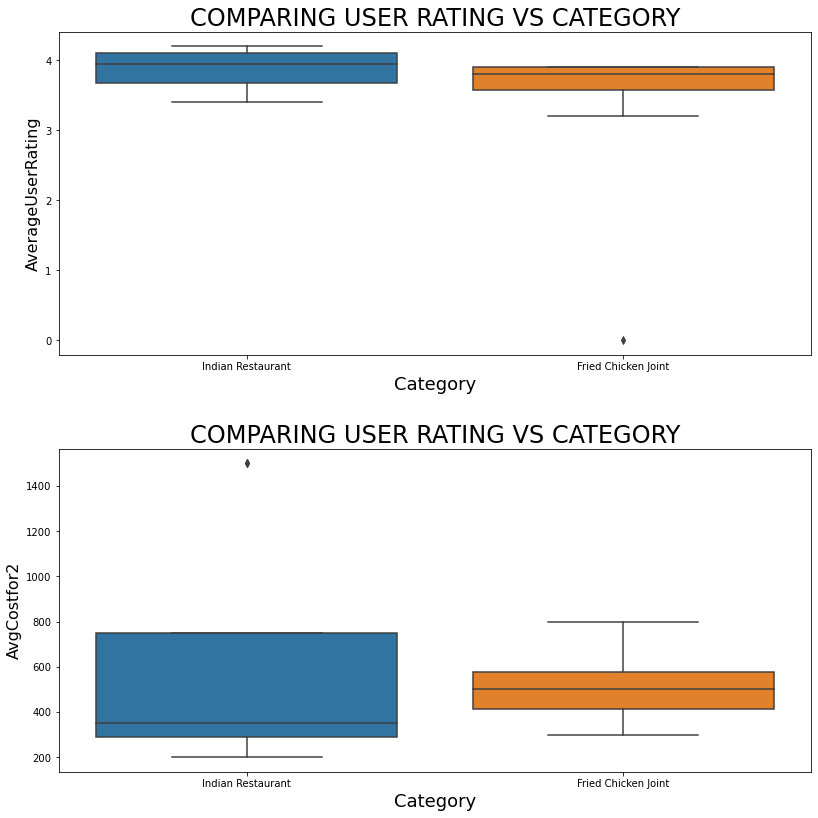

In [31]:
fig =plt.figure(1, figsize=(12, 12))
plt.subplot(2,1,1)
ax=sns.boxplot(x=DataMerged['Category'].loc[DataMerged['Bool'] == True], y="AverageUserRating", data=DataMerged);
ax.set_xlabel('Category', fontsize=18)
ax.set_ylabel('AverageUserRating', fontsize=16)
ax.set_title('COMPARING USER RATING VS CATEGORY',fontsize=24)
plt.subplot(2,1,2)
ax1=sns.boxplot(x=DataMerged['Category'].loc[DataMerged['Bool'] == True], y="AvgCostfor2", data=DataMerged);
ax1.set_xlabel('Category', fontsize=18)
ax1.set_ylabel('AvgCostfor2', fontsize=16)
ax1.set_title('COMPARING USER RATING VS CATEGORY',fontsize=24)
plt.subplot(2,1,2)
fig.tight_layout(pad=3.0)

# GROUPING BY CATEOGRY

In [32]:

DataMerged.groupby('Category')['AvgCostfor2','PriceRange','AverageUserRating'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,AvgCostfor2,PriceRange,AverageUserRating
Category,,,
Afghan Restaurant,400.000000,1.000000,3.600
BBQ Joint,575.000000,2.000000,3.900
Burger Joint,450.000000,1.000000,3.900
Chinese Restaurant,450.000000,1.000000,3.500
Fast Food Restaurant,350.000000,1.000000,3.950
Fish & Chips Shop,700.000000,2.000000,3.200
Food Truck,3000.000000,4.000000,4.000
Fried Chicken Joint,506.250000,1.625000,3.275
Indian Restaurant,618.750000,1.625000,3.875


# SCALING THE DATA

In [33]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(DataTo)

In [34]:
kmeans = KMeans(n_clusters=3 ,random_state=0).fit(minmax_scaled_df)

In [ ]:
DataMerged

# GROUPING BY LABEL AND NAMING EACH CATEGORY
1) 0--> MEDIUM USER RATING BUT LOW PRICE RANGE

2) 1--> MEDIUM PRICE RANGE AND LOW USER RATING

3) 2--> HIGH COST + HIGH RATING

In [ ]:
DataMerged['label']=kmeans.labels_
DataMerged.groupby('label')['AverageUserRating','AvgCostfor2','PriceRange'].mean()

In [ ]:
DataMerged.groupby(['Category','label'])['label'].count()

In [ ]:
DataMerged

In [ ]:
DataMerged.drop(['Bool'],axis=1,inplace=True)

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow

# MAPPING OUT ACCORDING TO CLUSTERS

In [ ]:

map_Delhi1 = folium.Map(location=[lat,lng], zoom_start=11)
for lat, lng, name,label in zip(DataMerged['location.lat'], DataMerged['location.lng'], DataMerged['name'],DataMerged['label']):
    label1 = folium.Popup(str(name) + ' Cluster ' + str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label1,
        color=rainbow[label-1],
        fill=True,      
        fill_opacity=0.7,
        parse_html=False).add_to(map_Delhi1)  
   
   
    
map_Delhi1